In [38]:
!pip install pyproj

In [39]:
!pip install geopandas

In [40]:
!pip uninstall cython -y
!pip install cython
!pip uninstall cartopy -y
!pip install cartopy

Found existing installation: Cython 3.0.2
Uninstalling Cython-3.0.2:
  Successfully uninstalled Cython-3.0.2
  Using cached Cython-3.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
Found existing installation: Cartopy 0.22.0
Uninstalling Cartopy-0.22.0:
  Successfully uninstalled Cartopy-0.22.0
  Using cached Cartopy-0.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)


In [41]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
  Using cached shapely-2.0.1-cp310-cp310-linux_x86_64.whl


In [42]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time

In [43]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [44]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)


In [45]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


In [46]:
df2 = df[['x', 'y']]

In [47]:
df2

,x,y
0,709584.027559,782579.281866
1,709262.121378,782963.354103
2,710847.924654,784163.825097
3,710863.366771,781635.895608
4,709314.159319,781570.969374
...,...,...
1257,709918.546763,782204.438977
1258,709466.644754,781388.734012
1259,709492.782783,784279.996264
1260,710198.574916,780930.648555


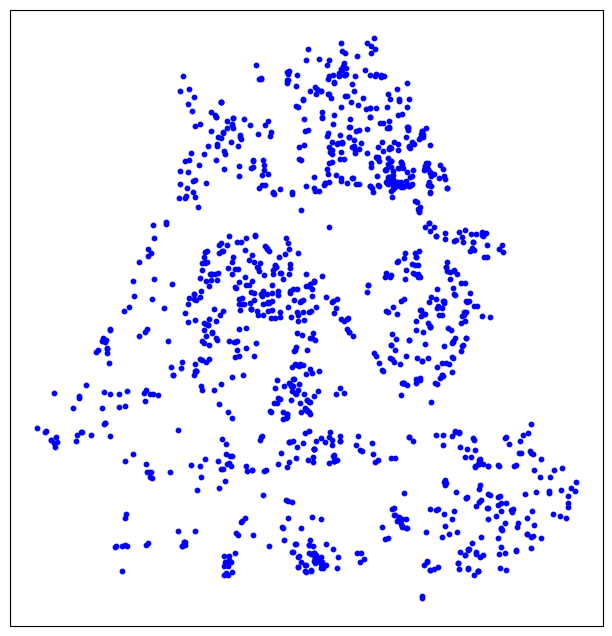

In [48]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)
plt.show()

In [49]:
#Se carga la cartografía de Floridablanca
url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.shp", "68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

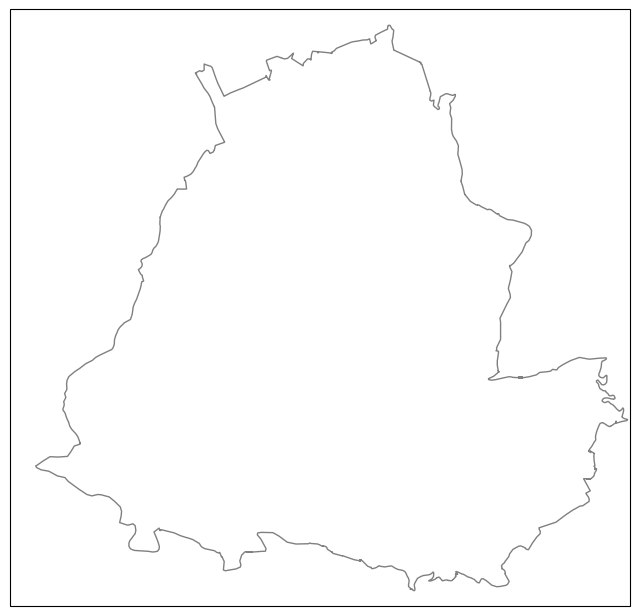

In [50]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

plt.show()

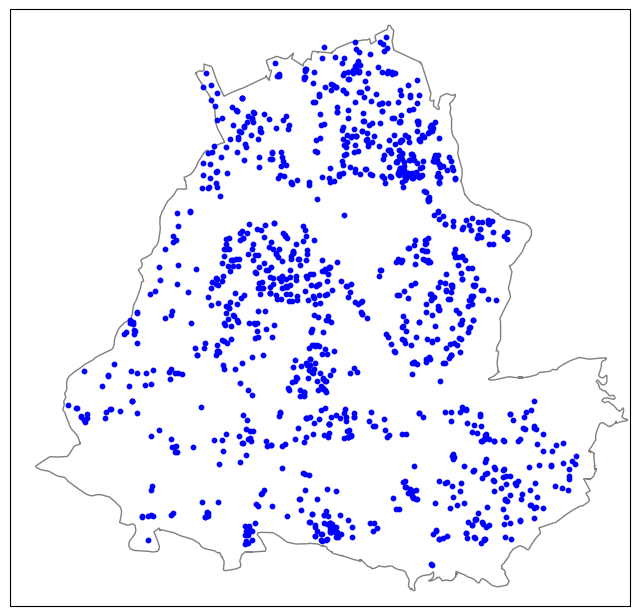

In [51]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

plt.show()

In [52]:
import numpy as np
from scipy.spatial import distance

def funcionK(listaPuntos, distMax):
    n = len(listaPuntos)  # Número de puntos
    k_values = []  # Almacenará los valores de K para cada punto

    for i in range(n):
        point = listaPuntos[i]
        distances = distance.cdist([point], listaPuntos, 'euclidean')[0]

        # Excluimos la distancia a sí mismo
        distances = distances[distances > 0]

        # Calcula la función K para la distancia actual
        k_value = np.sum(distances <= distMax)
        k_values.append(k_value)

    return k_values

# Crear una lista de tuplas de coordenadas a partir de tu DataFrame
lista_puntos = list(zip(df['x'], df['y']))

# Especifica la distancia máxima en metros
dist_max = 100.0  # 100 metros en UTM

# Calcula los valores de K
k_values = funcionK(lista_puntos, dist_max)

# Imprime los valores de K
for i, k in enumerate(k_values):
    print(f'Punto {i + 1}: K = {k}')



Punto 1: K = 4
Punto 2: K = 7
Punto 3: K = 9
Punto 4: K = 1
Punto 5: K = 3
Punto 6: K = 3
Punto 7: K = 10
Punto 8: K = 5
Punto 9: K = 5
Punto 10: K = 3
Punto 11: K = 2
Punto 12: K = 9
Punto 13: K = 6
Punto 14: K = 3
Punto 15: K = 5
Punto 16: K = 5
Punto 17: K = 0
Punto 18: K = 6
Punto 19: K = 3
Punto 20: K = 7
Punto 21: K = 7
Punto 22: K = 4
Punto 23: K = 10
Punto 24: K = 3
Punto 25: K = 4
Punto 26: K = 2
Punto 27: K = 5
Punto 28: K = 3
Punto 29: K = 29
Punto 30: K = 5
Punto 31: K = 5
Punto 32: K = 3
Punto 33: K = 3
Punto 34: K = 2
Punto 35: K = 3
Punto 36: K = 7
Punto 37: K = 4
Punto 38: K = 6
Punto 39: K = 6
Punto 40: K = 0
Punto 41: K = 2
Punto 42: K = 6
Punto 43: K = 1
Punto 44: K = 6
Punto 45: K = 5
Punto 46: K = 10
Punto 47: K = 5
Punto 48: K = 5
Punto 49: K = 2
Punto 50: K = 4
Punto 51: K = 3
Punto 52: K = 7
Punto 53: K = 30
Punto 54: K = 29
Punto 55: K = 8
Punto 56: K = 8
Punto 57: K = 0
Punto 58: K = 10
Punto 59: K = 4
Punto 60: K = 3
Punto 61: K = 17
Punto 62: K = 2
Punto 63:

In [53]:
from scipy.spatial import ConvexHull

# Calcular el cierre convexo
hull = ConvexHull(lista_puntos)

# Calcular el área del cierre convexo
area = hull.volume

# Imprimir el área
print(f'Área del cierre convexo: {area:.4f} metros cuadrados')


Área del cierre convexo: 14018507.3125 metros cuadrados


In [54]:

# Contar los valores iguales a 0
count_0 = k_values.count(0)

# Contar los valores iguales a 1
count_1 = k_values.count(1)

print(count_0 + count_1)

120


In [55]:
print(f'Area: {area:.2f}')
sumatoria = sum(k_values) / 2
print(f'Sumatoria: {sumatoria}')
Kr = area / (1262)**2
print(f'Kr: {Kr:.2f}')
EstimadorK = Kr * sumatoria
print(f'EstimadorK: {EstimadorK:.2f}')

Area: 14018507.31
Sumatoria: 3947.0
Kr: 8.80
EstimadorK: 34741.63


<ipython-input-56-9ae2292e1dd0>:64: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores_clusters = plt.cm.get_cmap('tab20', num_clusters)
/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:1696: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  result = super().scatter(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:1696: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* &

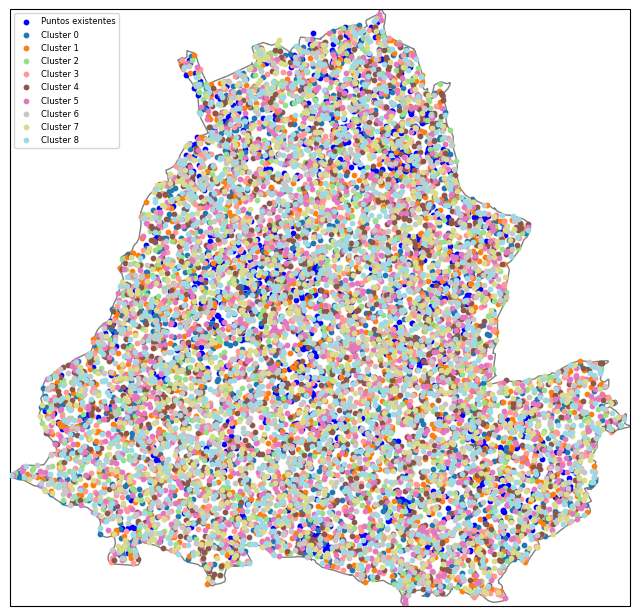

In [56]:
import random
import geopandas as gpd
import numpy as np
from scipy.spatial import Voronoi
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd

def generar_clusters_aleatorios_dentro_del_shapefile(shapefile_path, num_clusters, puntos_por_cluster):
    try:
        # Cargar el shapefile
        gdf = gpd.read_file(shapefile_path)

        # Obtener los límites del shapefile
        min_x, min_y, max_x, max_y = gdf.total_bounds

        clusters = []
        for cluster_id in range(num_clusters):
            # Generar puntos aleatorios dentro del shapefile
            puntos_aleatorios = []
            for _ in range(puntos_por_cluster):
                while True:
                    x = random.uniform(min_x, max_x)
                    y = random.uniform(min_y, max_y)
                    punto = Point(x, y)
                    # Verificar si el punto está dentro de la figura
                    if gdf.geometry.contains(punto).any():
                        puntos_aleatorios.append((x, y))
                        break
            clusters.append({
                'id': cluster_id,
                'puntos': puntos_aleatorios
            })
        return clusters
    except Exception as e:
        print(f"Error al cargar el shapefile: {str(e)}")
        return []

# Ruta al archivo shapefile '68276_urbano.shp'
shapefile_path = '68276_urbano.shp'

# Generar clusters de 8 puntos cada uno dentro de la figura del shapefile
num_clusters = 9  # Número de clusters
puntos_por_cluster = 1262  # Puntos por cluster
clusters_generados = generar_clusters_aleatorios_dentro_del_shapefile(shapefile_path, num_clusters, puntos_por_cluster)

# Verificar si se generaron clusters
if clusters_generados:
    # Crear una proyección y configurar el gráfico
    subplot_kw = dict(projection=ccrs.PlateCarree())
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

    gdf = gpd.read_file(shapefile_path)

    min_x, min_y, max_x, max_y = gdf.total_bounds

    # Definir el rango de coordenadas para la visualización
    ax.set_extent([min_x, max_x, min_y, max_y])

    # Agregar geometrías del shapefile
    gdf.plot(ax=ax, facecolor='white', edgecolor='gray')

    # Definir una paleta de colores para los clusters
    colores_clusters = plt.cm.get_cmap('tab20', num_clusters)

    # Agregar puntos existentes en azul
    ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10, label='Puntos existentes')

    # Agregar clusters de puntos generados con colores distintos
    for cluster in clusters_generados:
        cluster_id = cluster['id']
        puntos = cluster['puntos']
        puntos_x, puntos_y = zip(*puntos)
        color = colores_clusters(cluster_id)
        ax.scatter(puntos_x, puntos_y, zorder=10, c=color, s=10, label=f'Cluster {cluster_id}')

    # Agregar leyenda
    ax.legend(loc=2, prop={'size': 6})

    # Mostrar el gráfico
    plt.show()

    # Guardar los clusters en una lista o variable para su análisis posterior
    # En este ejemplo, los clusters se almacenan en una lista llamada 'clusters_generados'
else:
    print("No se generaron clusters dentro de la figura del shapefile.")


In [57]:
puntos_originales = list(zip(df['longitud'], df['latitud']))
lista_completa = [{'id': 'Puntos originales', 'puntos': puntos_originales}]
lista_completa.extend(clusters_generados)

In [58]:
import pyproj

# Definir la proyección UTM adecuada para tu zona geográfica
utm_proj = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

# Crear una nueva lista para almacenar los puntos en UTM
lista_completa_utm = []

# Iterar a través de lista_completa y transformar los puntos a UTM
for grupo in lista_completa:
    puntos_grupo_utm = [utm_proj(lon, lat) for lon, lat in grupo['puntos']]
    grupo_utm = {'id': grupo['id'], 'puntos': puntos_grupo_utm}
    lista_completa_utm.append(grupo_utm)

# Imprimir la nueva lista con puntos en UTM
for grupo in lista_completa_utm:
    print(f'Grupo: {grupo["id"]}')
    print(len(grupo['puntos']))


Grupo: Puntos originales
1262
Grupo: 0
1262
Grupo: 1
1262
Grupo: 2
1262
Grupo: 3
1262
Grupo: 4
1262
Grupo: 5
1262
Grupo: 6
1262
Grupo: 7
1262
Grupo: 8
1262


In [59]:
import numpy as np
from scipy.spatial import distance
from scipy.spatial import ConvexHull

def calcular_estimador_k_y_area(cluster, dist_max):
    # Extraer los puntos del cluster
    puntos_cluster = np.array(cluster['puntos'])
    n = len(puntos_cluster)  # Número de puntos en el cluster
    k_values = []  # Almacenará los valores de K para cada punto en el cluster

    for i in range(n):
        point = puntos_cluster[i]
        distances = distance.cdist([point], puntos_cluster, 'euclidean')[0]

        # Excluimos la distancia a sí mismo
        distances = distances[distances > 0]

        # Calcula la función K para la distancia actual
        k_value = np.sum(distances <= dist_max)
        k_values.append(k_value)

    # Calcular el cierre convexo del cluster
    hull = ConvexHull(puntos_cluster)

    # Calcular el área del cierre convexo
    area = hull.volume

    # Calcular la sumatoria de los valores de K
    sumatoria = sum(k_values) / 2

    # Calcular Kr
    Kr = area / n**2

    # Calcular el Estimador K
    estimador_k = Kr * sumatoria

    return {
        'id': cluster['id'],
        'EstimadorK': estimador_k,
        'Area': area
    }

# Especifica la distancia máxima en metros
dist_max = 100.0  # 100 metros en UTM

# Calcular el Estimador K y el área para cada cluster
resultados_clusters = [calcular_estimador_k_y_area(cluster, dist_max) for cluster in lista_completa_utm]

# Imprimir los resultados para cada cluster
for resultado in resultados_clusters:
    print(f'Cluster {resultado["id"]}:')
    print(f'Estimador K = {resultado["EstimadorK"]:.2f}')
    print(f'Área del cierre convexo = {resultado["Area"]:.2f} metros cuadrados')
    print()


Cluster Puntos originales:
Estimador K = 34741.63
Área del cierre convexo = 14018507.31 metros cuadrados

Cluster 0:
Estimador K = 16946.52
Área del cierre convexo = 15709998.90 metros cuadrados

Cluster 1:
Estimador K = 17593.36
Área del cierre convexo = 15929480.77 metros cuadrados

Cluster 2:
Estimador K = 16716.48
Área del cierre convexo = 15904063.74 metros cuadrados

Cluster 3:
Estimador K = 17094.56
Área del cierre convexo = 15828804.48 metros cuadrados

Cluster 4:
Estimador K = 16888.55
Área del cierre convexo = 15812726.38 metros cuadrados

Cluster 5:
Estimador K = 17704.45
Área del cierre convexo = 16186502.71 metros cuadrados

Cluster 6:
Estimador K = 17135.63
Área del cierre convexo = 15639521.52 metros cuadrados

Cluster 7:
Estimador K = 16674.17
Área del cierre convexo = 15457519.89 metros cuadrados

Cluster 8:
Estimador K = 16337.12
Área del cierre convexo = 15759669.63 metros cuadrados



In [60]:
import numpy as np
from scipy.spatial import distance
from scipy.spatial import ConvexHull
import pandas as pd

def calcular_estimador_k_y_area(cluster, dist_max):
    # Extraer los puntos del cluster
    puntos_cluster = np.array(cluster['puntos'])
    n = len(puntos_cluster)  # Número de puntos en el cluster
    k_values = []  # Almacenará los valores de K para cada punto en el cluster

    for i in range(n):
        point = puntos_cluster[i]
        distances = distance.cdist([point], puntos_cluster, 'euclidean')[0]

        # Excluimos la distancia a sí mismo
        distances = distances[distances > 0]

        # Calcula la función K para la distancia actual
        k_value = np.sum(distances <= dist_max)
        k_values.append(k_value)

    # Calcular el cierre convexo del cluster
    hull = ConvexHull(puntos_cluster)

    # Calcular el área del cierre convexo
    area = hull.volume

    # Calcular la sumatoria de los valores de K
    sumatoria = sum(k_values) / 2

    # Calcular Kr
    Kr = area / n**2

    # Calcular el Estimador K
    estimador_k = Kr * sumatoria

    return {
        'id': cluster['id'],
        'EstimadorK': estimador_k,
        'Area': area
    }

# Especifica las distancias máximas en metros
dist_max_values = list(range(20, 201, 20))  # Valores de 20 a 200 en incrementos de 20 metros

# Crear una lista para almacenar los resultados
resultados_clusters = []

# Calcular el Estimador K para cada distancia máxima
for dist_max in dist_max_values:
    resultados_clusters_dist_max = [calcular_estimador_k_y_area(cluster, dist_max) for cluster in lista_completa_utm]
    resultados_clusters.append(resultados_clusters_dist_max)

# Crear un DataFrame para los resultados
df_resultados = pd.DataFrame()

# Agregar los resultados al DataFrame
for i, dist_max in enumerate(dist_max_values):
    df_temp = pd.DataFrame({
        'Cluster': [resultado['id'] for resultado in resultados_clusters[i]],
        f'EstimadorK_{dist_max}m': [resultado['EstimadorK'] for resultado in resultados_clusters[i]]
    })
    if i == 0:
        df_resultados = df_temp
    else:
        df_resultados = pd.merge(df_resultados, df_temp, on='Cluster')

# Imprimir el DataFrame
df_resultados


,Cluster,EstimadorK_20m,EstimadorK_40m,EstimadorK_60m,EstimadorK_80m,EstimadorK_100m,EstimadorK_120m,EstimadorK_140m,EstimadorK_160m,EstimadorK_180m,EstimadorK_200m
0,Puntos originales,3318.366978,8238.704220,15702.829412,24812.935040,34741.629870,46342.711240,59985.864597,75204.582115,90484.913874,107604.870828
1,0,542.525473,2406.840281,5839.546912,10742.004369,16946.522963,24433.374493,32679.761686,42405.763806,53335.186066,65694.902755
2,1,530.101191,2890.551775,6541.248654,11192.136458,17593.358383,24344.647131,33066.312003,42758.162073,53770.264165,66132.624006
3,2,808.861970,2975.813172,6081.443698,10794.812212,16716.480706,24545.465697,33133.382906,43159.276949,54633.133778,67435.121990
4,3,665.892629,2753.018779,6082.481923,10962.381636,17094.557039,24975.942930,33741.872761,43481.794795,54394.482952,67145.829859
5,4,665.216249,2571.507588,6304.661462,11110.104214,16888.549838,24414.429189,33231.026635,43576.628593,54537.803796,67216.626926
6,5,741.920164,2774.578147,6321.566328,11159.292328,17704.451034,25052.509644,34026.694640,44515.209833,55755.808481,68581.880355
7,6,785.587816,2651.358880,6314.162073,10801.832473,17135.634241,24765.655906,32955.408890,42510.120704,53527.989827,66028.655952
8,7,659.978848,2620.504250,6143.626631,10685.833998,16674.171488,23817.471962,32348.669132,41811.601147,53467.992274,66492.868955
9,8,702.565384,2711.308666,6006.439270,10112.983417,16337.119004,23837.746626,32298.217097,41777.902140,53177.272880,65833.345082


In [61]:
# Crear un diccionario para almacenar los resultados de percentiles
percentiles_dict = {}

# Iterar a través de las columnas del DataFrame
for col in df_resultados.columns:
    if col != 'Cluster':  # Excluir la columna 'Cluster'
        # Ordenar los valores de la columna actual
        sorted_values = df_resultados.sort_values(by=col)[col]

        # Calcular los percentiles 25 y 97.5
        percentile_2_5 = sorted_values.quantile(0.025)
        percentile_97_5 = sorted_values.quantile(0.975)

        # Agregar los percentiles al diccionario
        percentiles_dict[f'Percentil_2_5_{col}'] = percentile_2_5
        percentiles_dict[f'Percentil_97_5_{col}'] = percentile_97_5

# Crear un DataFrame con los resultados de los percentiles
df_percentiles = pd.DataFrame.from_dict(percentiles_dict, orient='index', columns=['Valor'])

# Imprimir el DataFrame de percentiles
df_percentiles


,Valor
Percentil_2_5_EstimadorK_20m,532.896654
Percentil_97_5_EstimadorK_20m,2753.728351
Percentil_2_5_EstimadorK_40m,2443.890425
Percentil_97_5_EstimadorK_40m,7054.553735
Percentil_2_5_EstimadorK_60m,5877.097692
Percentil_97_5_EstimadorK_60m,13641.473741
Percentil_2_5_EstimadorK_80m,10241.874798
Percentil_97_5_EstimadorK_80m,21748.255359
Percentil_2_5_EstimadorK_100m,16412.955813
Percentil_97_5_EstimadorK_100m,30908.264632


In [62]:
# Crear un DataFrame para los percentiles 2.5 y 97.5
df_percentiles_2_5_97_5 = pd.DataFrame(columns=['Distancia', 'Percentil_2.5', 'Percentil_97.5'])

# Crear una lista de distancias de 20 a 200 en incrementos de 20
distancias = list(range(20, 201, 20))

# Iterar a través de las distancias y calcular los percentiles 2.5 y 97.5
for distancia in distancias:
    columna_percentil_2_5 = f'Percentil_2_5_EstimadorK_{distancia}m'
    columna_percentil_97_5 = f'Percentil_97_5_EstimadorK_{distancia}m'

    percentil_2_5 = df_percentiles.at[columna_percentil_2_5, 'Valor']
    percentil_97_5 = df_percentiles.at[columna_percentil_97_5, 'Valor']

    df_percentiles_2_5_97_5 = pd.concat([df_percentiles_2_5_97_5, pd.DataFrame({'Distancia': [distancia], 'Percentil_2.5': [percentil_2_5], 'Percentil_97.5': [percentil_97_5]})], ignore_index=True)

# Crear un DataFrame para los valores reales de K
df_valores_reales_K = pd.DataFrame(columns=['Distancia', 'Valor_Real_K'])

# Iterar a través de las distancias y obtener los valores reales de K
for distancia in distancias:
    columna_valor_real_K = f'EstimadorK_{distancia}m'

    valor_real_K = df_resultados.at[0, columna_valor_real_K]  # Tomar el valor de K del primer cluster

    df_valores_reales_K = pd.concat([df_valores_reales_K, pd.DataFrame({'Distancia': [distancia], 'Valor_Real_K': [valor_real_K]})], ignore_index=True)

# Combinar los DataFrames de percentiles y valores reales de K
df_final = pd.merge(df_percentiles_2_5_97_5, df_valores_reales_K, on='Distancia')

# Imprimir el DataFrame final
df_final


,Distancia,Percentil_2.5,Percentil_97.5,Valor_Real_K
0,20,532.896654,2753.728351,3318.366978
1,40,2443.890425,7054.553735,8238.704220
2,60,5877.097692,13641.473741,15702.829412
3,80,10241.874798,21748.255359,24812.935040
4,100,16412.955813,30908.264632,34741.629870
5,120,23822.033762,41552.415881,46342.711240
6,140,32309.568805,54145.051356,59985.864597
7,160,41785.484417,68299.473352,75204.582115
8,180,53212.803347,82670.865161,90484.913874
9,200,65726.052279,98824.697972,107604.870828


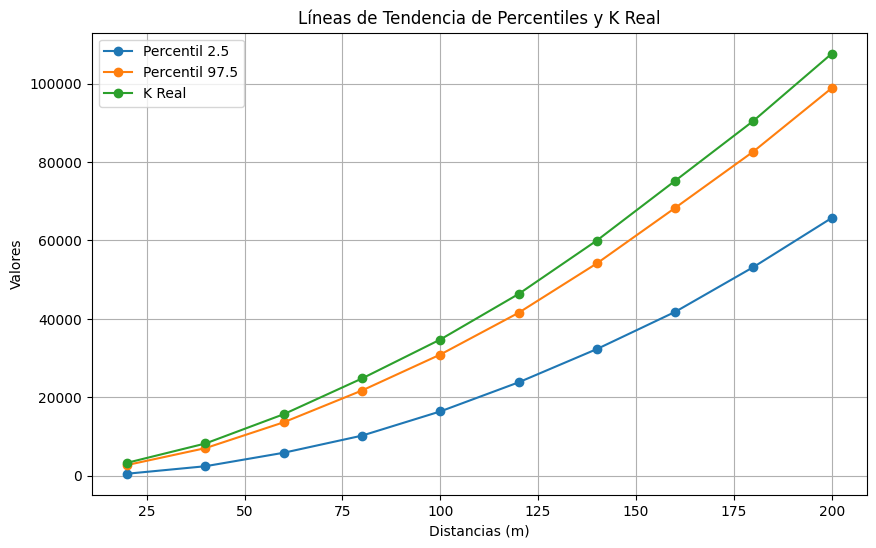

In [63]:
import matplotlib.pyplot as plt

# Extraer las columnas de interés de df_final
distancias = df_final['Distancia']
percentil_2_5 = df_final['Percentil_2.5']
percentil_97_5 = df_final['Percentil_97.5']
valor_real_K = df_final['Valor_Real_K']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Agregar líneas de tendencia para los percentiles
ax.plot(distancias, percentil_2_5, label='Percentil 2.5', marker='o')
ax.plot(distancias, percentil_97_5, label='Percentil 97.5', marker='o')
ax.plot(distancias, valor_real_K, label='K Real', marker='o')

# Etiquetas de los ejes y título
ax.set_xlabel('Distancias (m)')
ax.set_ylabel('Valores')
ax.set_title('Líneas de Tendencia de Percentiles y K Real')

# Mostrar la leyenda
ax.legend()

# Mostrar la figura
plt.grid()
plt.show()


**Conclusiones:** Existe una tendencia significativa de aglomeración o agrupamiento de puntos geográficos en el conjunto de datos. Puede ser indicativo de patrones espaciales o de comportamientos que provocan que los puntos se agrupen en esa distancia específica.